In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 


In [2]:
from sklearn.model_selection import  train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_csv('heart.csv')

In [ ]:
1 id: patient identification number
2 ccf: social security number (I replaced this with a dummy value of 0)
3 age: age in years
4 sex: sex (1 = male; 0 = female)
5 painloc: chest pain location (1 = substernal; 0 = otherwise)
6 painexer (1 = provoked by exertion; 0 = otherwise)
7 relrest (1 = relieved after rest; 0 = otherwise)
8 pncaden (sum of 5, 6, and 7)
9 cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)
11 htn
12 chol: serum cholestoral in mg/dl
13 smoke: I believe this is 1 = yes; 0 = no (is or is not a smoker)
14 cigs (cigarettes per day)
15 years (number of years as a smoker)
16 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
17 dm (1 = history of diabetes; 0 = no such history)
18 famhist: family history of coronary artery disease (1 = yes; 0 = no)
19 restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
20 ekgmo (month of exercise ECG reading)
21 ekgday(day of exercise ECG reading)
22 ekgyr (year of exercise ECG reading)
23 dig (digitalis used furing exercise ECG: 1 = yes; 0 = no)
24 prop (Beta blocker used during exercise ECG: 1 = yes; 0 = no)
25 nitr (nitrates used during exercise ECG: 1 = yes; 0 = no)
26 pro (calcium channel blocker used during exercise ECG: 1 = yes; 0 = no)
27 diuretic (diuretic used used during exercise ECG: 1 = yes; 0 = no)
28 proto: exercise protocol

In [ ]:
age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [4]:
#type of chest painis also a categorical data but given as 0,1,2,3, it will think as weightage , so we need to convert into get dummies 
df.head() #gender - female 0 male-1  # it is formatted data #categorical data sets should always be converted into get dummies ,
#cp and thal need to be converted into get dummies 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
cps = pd.get_dummies(df['cp']).rename(columns= {0:'cp_1',1:'cp_2',2:'cp_3',4:'cp_4'},)

In [19]:

df = pd.concat([df,cps],axis = 1)
df.drop('cp',axis = 1,inplace = True)
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_1,cp_2,cp_3,3
0,63,1,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1
1,37,1,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0


In [20]:
cps

,cp_1,cp_2,cp_3,3
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
298,1,0,0,0
299,0,0,0,1
300,1,0,0,0
301,1,0,0,0


In [23]:
thals = pd.get_dummies(df['thal']).rename(columns= {0:'thal_0',1:'thal_1',2:'thal_2',3:'thal_3'},)
thals

,thal_0,thal_1,thal_2,thal_3
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
298,0,0,0,1
299,0,0,0,1
300,0,0,0,1
301,0,0,0,1


In [24]:
df = pd.concat([df,thals],axis = 1)
df.drop('thal',axis = 1,inplace = True)
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,3,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,0,0,1,0,0,0,1,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,0,1,0,0,1,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,1,0,1,0,0,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,2,0,1,0,1,0,0,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,2,0,1,1,0,0,0,0,0,1,0


In [25]:
x = df.drop('target',axis = 1)
y = df['target'] #seperating the data 

In [27]:
x.describe()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,3,thal_0,thal_1,thal_2,thal_3
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,0.471947,0.165017,0.287129,0.075908,0.006601,0.059406,0.547855,0.386139
std,9.082101,0.466011,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.500038,0.371809,0.453171,0.265288,0.081110,0.236774,0.498528,0.487668
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
#standard scaler -- when we use knn -data must be normalised --fluctuating features me standard scalers doeesnt work 
#so at first we need to use normalisation

In [29]:
x_sc = StandardScaler().fit_transform(x)

In [30]:
x_sc

array([[ 0.9521966 ,  0.68100522,  0.76395577, ...,  3.97911213,
        -1.10076284, -0.79311554],
       [-1.91531289,  0.68100522, -0.09273778, ..., -0.25131234,
         0.9084609 , -0.79311554],
       [-1.47415758, -1.46841752, -0.09273778, ..., -0.25131234,
         0.9084609 , -0.79311554],
       ...,
       [ 1.50364073,  0.68100522,  0.70684287, ..., -0.25131234,
        -1.10076284,  1.26085034],
       [ 0.29046364,  0.68100522, -0.09273778, ..., -0.25131234,
        -1.10076284,  1.26085034],
       [ 0.29046364, -1.46841752, -0.09273778, ..., -0.25131234,
         0.9084609 , -0.79311554]])

In [32]:
x_sc = pd.DataFrame(StandardScaler().fit_transform(x),columns=x.columns)

In [33]:
x_sc.describe() #so we can see std deviation is near 1 all of them, an mean is almost 0 
#data is divided by std, and subtracted by mean 
#this  is the way to work with knn 


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,3,thal_0,thal_1,thal_2,thal_3
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,5.825923e-17,-1.319077e-17,-7.146832e-16,-9.828955e-17,-3.664102e-19,2.652810e-16,-5.203025e-16,-5.203025e-16,-3.140136e-16,1.355718e-16,4.752341e-16,1.202192e-15,-3.297692e-16,3.341661e-16,1.183505e-16,-1.218314e-17,-1.282436e-17,6.020120e-16,4.125779e-16
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-1.468418e+00,-2.148802e+00,-2.324160e+00,-4.176345e-01,-1.005832e+00,-3.439267e+00,-6.966305e-01,-8.968617e-01,-2.274579e+00,-7.144289e-01,-9.453835e-01,-4.445542e-01,-6.346478e-01,-2.866058e-01,-8.151391e-02,-2.513123e-01,-1.100763e+00,-7.931155e-01
25%,-7.572802e-01,-1.468418e+00,-6.638668e-01,-6.814943e-01,-4.176345e-01,-1.005832e+00,-7.061105e-01,-6.966305e-01,-8.968617e-01,-6.491132e-01,-7.144289e-01,-9.453835e-01,-4.445542e-01,-6.346478e-01,-2.866058e-01,-8.151391e-02,-2.513123e-01,-1.100763e+00,-7.931155e-01
50%,6.988599e-02,6.810052e-01,-9.273778e-02,-1.210553e-01,-4.176345e-01,8.989622e-01,1.466343e-01,-6.966305e-01,-2.067053e-01,-6.491132e-01,-7.144289e-01,-9.453835e-01,-4.445542e-01,-6.346478e-01,-2.866058e-01,-8.151391e-02,-2.513123e-01,9.084609e-01,-7.931155e-01
75%,7.316189e-01,6.810052e-01,4.783913e-01,5.456738e-01,-4.176345e-01,8.989622e-01,7.151309e-01,1.435481e+00,4.834512e-01,9.763521e-01,2.650822e-01,1.057772e+00,-4.445542e-01,1.575677e+00,-2.866058e-01,-8.151391e-02,-2.513123e-01,9.084609e-01,1.260850e+00
max,2.496240e+00,6.810052e-01,3.905165e+00,6.140401e+00,2.394438e+00,2.803756e+00,2.289429e+00,1.435481e+00,4.451851e+00,9.763521e-01,3.203615e+00,1.057772e+00,2.249444e+00,1.575677e+00,3.489114e+00,1.226784e+01,3.979112e+00,9.084609e-01,1.260850e+00


In [36]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   trestbps  303 non-null    int64  
 3   chol      303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    int64  
 11  target    303 non-null    int64  
 12  cp_1      303 non-null    uint8  
 13  cp_2      303 non-null    uint8  
 14  cp_3      303 non-null    uint8  
 15  3         303 non-null    uint8  
 16  thal_0    303 non-null    uint8  
 17  thal_1    303 non-null    uint8  
 18  thal_2    303 non-null    uint8  
 19  thal_3    303 non-null    uint8  
dtypes: float64(1), int64(11), uint8(

In [34]:
xtrain,xtest,ytrain,ytest = train_test_split(x_sc,y,test_size = 0.3,random_state=101)

In [37]:
model = KNeighborsClassifier().fit(xtrain,ytrain)

In [38]:
model.score(xtest,ytest)  #gap of almost 10 percent 

0.7802197802197802

In [39]:
model.score(xtrain,ytrain)

0.8820754716981132

In [ ]:
#try to modify the no of neighbours, leaf size, algorithm, brute is the slowest, leaf_size, power parameter , 

In [40]:
#loop banalete hai neighbours ke liye numbers set karenge --uska score lenge -- or phir dekhte hai konse number pe it's owrking best 
scores = []
for i in range(3,31):
    model_i = KNeighborsClassifier(n_neighbors=i).fit(xtrain,ytrain)
    scores.append(model_i.score(xtest,ytest))



In [41]:
import numpy as np

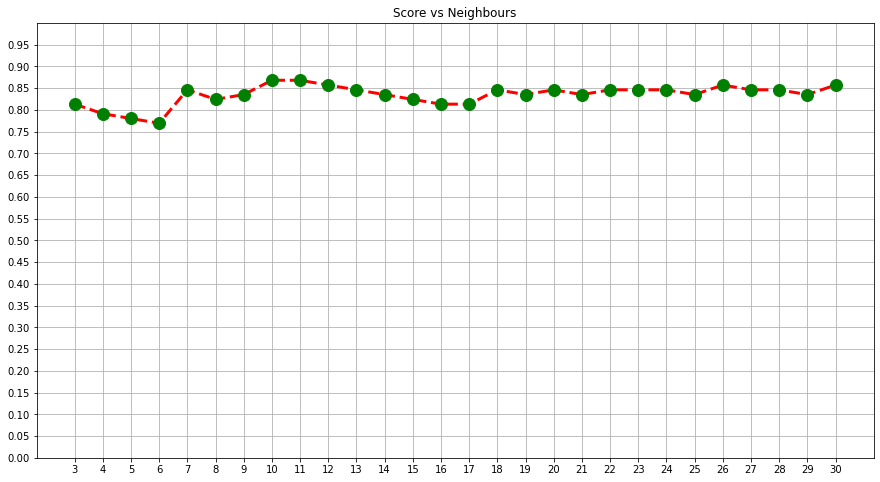

In [44]:
#Let's see the plot for scores now 
plt.figure(figsize=(15,8))
plt.plot(range(3,31),scores, color = 'r',linestyle='--',lw =3,marker='o',markerfacecolor='green',markeredgecolor = 'green',markersize=12)
plt.xticks(range(3,31))
plt.ylim([0,1])
plt.yticks(np.arange(0.0,1.0,0.05))
plt.title('Score vs Neighbours')
plt.grid()

In [45]:
#we can see that the score is almost normal in all 
#so we can see that the highest one is nearly 88 something


In [46]:
model_knn = KNeighborsClassifier(n_neighbors=10).fit(xtrain,ytrain)
print(round(model_knn.score(xtest,ytest)*100,2),'%')

86.81 %


In [47]:
from sklearn.svm import SVC

In [48]:
model_svc = SVC().fit(xtrain,ytrain)
print(round(model_svc.score(xtest,ytest)*100,2),'%')

83.52 %


In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
model_rf = RandomForestClassifier().fit(xtrain,ytrain)
print(round(model_rf.score(xtest,ytest)*100,2),'%')

83.52 %


In [52]:
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(x,y,test_size = 0.3,random_state = 101)

In [53]:
model_rf1 = RandomForestClassifier().fit(xtrain1,ytrain1)
print(round(model_rf1.score(xtest,ytest)*100,2),'%')

83.52 %


###### Classification we used alll /n
#bagging or boosting -- we have to see now /n/n\n
#these are very old techniques /n
#they are not very much used these days 
#bagging-- when we create RF --igt pickup the data--catches -some limited /n/n#features-- ma5kes trees on it 
##---bagging --fetch up some random rows -- and tries algorithms -----like i can use svc in it , on my wish i can change the algo as well, 
----and that result is like divide and conquer 
---boosting-- we actually provide some weights to it , ki le bahi tu ye pakar or bata kesa challl raha hai
it aggreagtes on diff basis and configure it 
--xGboost ---- it goes to find the best and allocate parameters itself and find it out to see where the best work is done

In [55]:
from sklearn.ensemble import BaggingClassifier

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
model_bag = BaggingClassifier(DecisionTreeClassifier(),n_estimators=100).fit(xtrain,ytrain)
print(round(model_bag.score(xtest,ytest)*100,2),'%')

81.32 %


In [60]:
#not improved at all 


In [61]:
#another shot 
model_bag2 = BaggingClassifier(SVC(),n_estimators=20).fit(xtrain,ytrain)
print(round(model_bag2.score(xtest,ytest)*100,2),'%')

82.42 %


In [62]:
model_bag3 = BaggingClassifier(KNeighborsClassifier(n_neighbors=10),n_estimators=20).fit(xtrain,ytrain)
print(round(model_bag3.score(xtest,ytest)*100,2),'%')

84.62 %


In [63]:
#the best part is that it is able to perform on every algo

In [64]:
!pip install xgboost

In [66]:
import xgboost as xgb

In [68]:
model_xgb = xgb.XGBClassifier().fit(xtrain,ytrain)

C:\Users\Shalu Kumari\ML\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:50:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [69]:

print(round(model_xgb.score(xtest,ytest)*100,2),'%')

80.22 %


In [70]:
#we got better results 

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
model_logit = LogisticRegression().fit(xtrain,ytrain)
print(round(model_logit.score(xtest,ytest)*100,2),'%')

84.62 %


In [73]:
#Logistic  cannnot compete with knn in this case

In [ ]:
#Missing data thing is still to be talked about -- if missing data is there then how to deal will be it 
--coming days task -- missing data 
----------------------web scrapping /API integration
----------------------NLP (Natural language processing )--spams detect karna --builtin libraries -ocr , speech recognition 
----------------------Weather (Data Visualisation part -seaborn,plotly )
----------------------Sound processing --singnal processing 
-----------------------UNsupervised machine learning 
-----------------------Neural networks --(chat bot , knn, rnn )
-----------------------Flask development 
---course content ---Data- Titanic Data -- 